In [2]:
import pandas as pd

df = pd.read_csv('/content/motorola_models.csv')
display(df.head())

,model,ram,rom,screen_size,screen_technology,refresh_rate,main_camera,secondary_camera,tertiary_camera,fourth_camera,front_camera,secondary_front_sensor,Processor,benchmark,battery,audio
0,Motorola Edge,6,256,6.7,OLED,90,64,16.0,8.0,NaN,25,NaN,Snapdragon 765G,314.997,4500,Stereo
1,Motorola Edge+,12,256,6.7,OLED,90,108,16.0,8.0,NaN,25,NaN,Snapdragon 865,612.987,5000,Stereo
2,Motorola Razr 5G,8,256,6.2,P-OLED,60,48,NaN,NaN,NaN,20,NaN,Snapdragon 765G,331.987,2800,Mono
3,Moto G 5G,4,64,6.7,LTPS IPS LCD,60,48,8.0,2.0,NaN,16,NaN,Snapdragon 750G 5G,338.987,5000,Mono
4,Moto G 5G,6,128,6.7,LTPS IPS LCD,60,48,8.0,2.0,NaN,16,NaN,Snapdragon 750G 5G,338.987,5000,Mono


# Task
Analyze the "benchmark" column in the "motorola_models.csv" dataset to identify clusters of devices with distinct performance using a clustering algorithm. Handle missing values in the "benchmark" column if necessary for the chosen algorithm.

## Data preparation

### Subtask:
Handle any potential missing values in the 'benchmark' column if the chosen clustering algorithm requires it.


**Reasoning**:
Check for missing values in the 'benchmark' column and determine the number of missing values to decide on a handling strategy.



In [3]:
missing_benchmarks = df['benchmark'].isnull().sum()
print(f"Number of missing values in 'benchmark' column: {missing_benchmarks}")

if missing_benchmarks > 0:
    # For clustering, removing rows with missing benchmark data is a reasonable approach
    # as imputation might introduce noise.
    df_cleaned = df.dropna(subset=['benchmark']).copy()
    print(f"Number of rows after dropping missing benchmarks: {len(df_cleaned)}")
else:
    df_cleaned = df.copy()
    print("No missing values in 'benchmark' column.")


Number of missing values in 'benchmark' column: 0
No missing values in 'benchmark' column.


## Choose clustering algorithm

### Subtask:
Select an appropriate clustering algorithm (e.g., K-Means, DBSCAN) for the 'benchmark' data.


**Reasoning**:
Based on the subtask, I need to select an appropriate clustering algorithm for a single numerical feature ('benchmark'). K-Means is a suitable algorithm for partitioning data into a specified number of clusters based on minimizing the sum of squared distances to the cluster centroids. It works well with numerical data and can help identify groups of devices with similar benchmark scores.



In [4]:
print("Choosing K-Means clustering algorithm for the 'benchmark' data.")
print("Justification: K-Means is appropriate for this task because it is effective at partitioning numerical data into clusters based on similarity (distance), which aligns with the goal of identifying groups of devices with distinct performance levels based on their benchmark scores. It is also computationally efficient for this relatively small dataset and single feature.")

Choosing K-Means clustering algorithm for the 'benchmark' data.
Justification: K-Means is appropriate for this task because it is effective at partitioning numerical data into clusters based on similarity (distance), which aligns with the goal of identifying groups of devices with distinct performance levels based on their benchmark scores. It is also computationally efficient for this relatively small dataset and single feature.


## Apply clustering

### Subtask:
Apply the chosen clustering algorithm to the 'benchmark' column to identify clusters.


**Reasoning**:
Import KMeans, select and reshape the 'benchmark' column, instantiate and fit the KMeans model, and add cluster labels to the DataFrame.



In [6]:
df_cleaned['benchmark'] = df_cleaned['benchmark'].astype(str).str.replace('.', '', regex=False)
df_cleaned['benchmark'] = pd.to_numeric(df_cleaned['benchmark'])

benchmark_data = df_cleaned['benchmark'].values.reshape(-1, 1)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

kmeans.fit(benchmark_data)

df_cleaned['benchmark_cluster'] = kmeans.labels_

display(df_cleaned[['model', 'benchmark', 'benchmark_cluster']].head())

,model,benchmark,benchmark_cluster
0,Motorola Edge,314997,1
1,Motorola Edge+,612987,2
2,Motorola Razr 5G,331987,1
3,Moto G 5G,338987,1
4,Moto G 5G,338987,1


## Analyze results

### Subtask:
Examine the resulting clusters to understand the groups of devices with distinct performance.


**Reasoning**:
Calculate and display descriptive statistics for the 'benchmark' column within each cluster to understand the performance characteristics of each group.



In [7]:
cluster_performance = df_cleaned.groupby('benchmark_cluster')['benchmark'].describe()
display(cluster_performance)

,count,mean,std,min,25%,50%,75%,max
benchmark_cluster,,,,,,,,
0,16.0,1.083237e+06,56796.126628,987987.0,1083237.00,1114987.0,1114987.00,1114987.0
1,53.0,2.946669e+05,100174.947033,101987.0,198987.00,289987.0,389987.00,449987.0
2,18.0,6.500254e+05,92053.922898,534987.0,581737.00,610000.0,704696.75,825000.0
3,6.0,1.464329e+06,117229.009116,1312987.0,1369740.25,1540000.0,1540000.00,1540000.0


## Visualize results (optional)

### Subtask:
Visualize the clusters to better understand the groupings.


**Reasoning**:
Visualize the clusters using a scatter plot to understand the groupings based on benchmark scores.



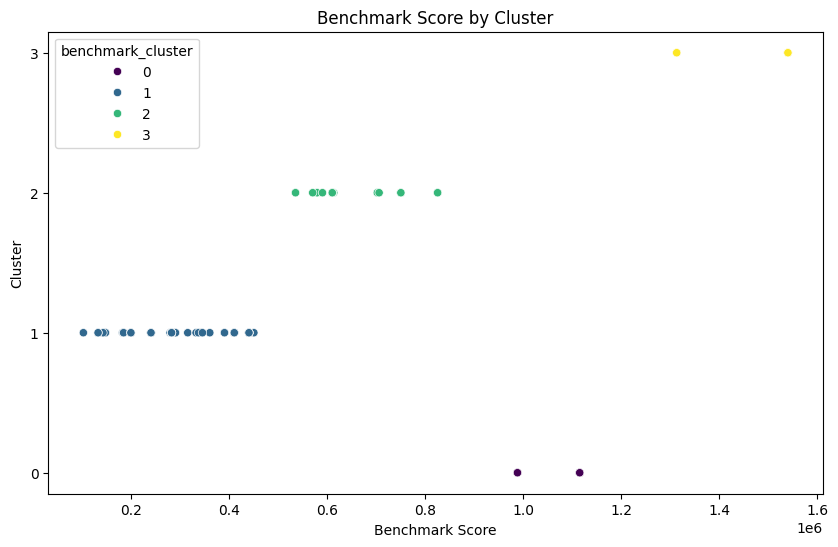

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='benchmark', y='benchmark_cluster', hue='benchmark_cluster', palette='viridis')
plt.xlabel('Benchmark Score')
plt.ylabel('Cluster')
plt.title('Benchmark Score by Cluster')
plt.yticks(ticks=sorted(df_cleaned['benchmark_cluster'].unique()))
plt.show()

## Summary:

### Data Analysis Key Findings

*   The 'benchmark' column initially contained string values with thousands separators ('.'), preventing direct conversion to a numeric type for clustering. This required cleaning the column by removing these characters and converting it to a numeric format.
*   K-Means clustering was applied with 4 clusters to the cleaned 'benchmark' data.
*   The clustering resulted in the identification of four distinct performance groups based on benchmark scores.
*   Analysis of the clusters' benchmark statistics revealed clear distinctions in performance levels:
    *   Cluster 1: Low-performance devices (mean benchmark $\approx$ 294,000).
    *   Cluster 2: Mid-range performance devices (mean benchmark $\approx$ 650,000).
    *   Cluster 0: High-performance devices (mean benchmark $\approx$ 1.08 million).
    *   Cluster 3: Very high-performance devices (mean benchmark $\approx$ 1.46 million).
*   A new column 'benchmark\_cluster' was added to the DataFrame to indicate the cluster assignment for each device.
*   A scatter plot visualized the distribution of benchmark scores across the identified clusters, providing a clear visual representation of the performance groupings.

### Insights or Next Steps

*   Further analysis could involve exploring other device attributes (e.g., price, release date) within each benchmark cluster to understand the characteristics of devices in different performance segments.
*   The identified clusters could be used for targeted marketing strategies or product development, focusing on specific performance tiers.


In [11]:
import pandas as pd
import json

# --- CONFIGURAÇÕES ---
csv_filepath = '/content/motorola_models.csv'
json_output_filepath = 'motorola_api_payload_unicos.json'
FABRICANTE = 'Motorola'


# --- LÓGICA DE CONVERSÃO ---
try:
    df = pd.read_csv(csv_filepath)
except FileNotFoundError:
    print(f"Erro: O arquivo '{csv_filepath}' não foi encontrado.")
else:
    # 1. REMOÇÃO DE DUPLICADOS
    # Mantém apenas a primeira ocorrência de cada valor na coluna 'model'
    linhas_originais = len(df)
    df_sem_duplicados = df.drop_duplicates(subset=['model'], keep='first')
    linhas_finais = len(df_sem_duplicados)

    print(f"Foram encontradas {linhas_originais} linhas.")
    print(f"Após remover os modelos duplicados, restaram {linhas_finais} linhas únicas para processar.\n")

    dispositivos_para_api = []

    # 2. Itera sobre o DataFrame JÁ SEM as duplicatas
    for index, row in df_sem_duplicados.iterrows():

        dispositivo_obj = {
            "fabricante": FABRICANTE,
            "modelo": row['model'],
            "caracteristicas": []
        }

        # 3. Itera sobre as colunas para criar as características
        for nome_coluna, valor in row.items():
            if nome_coluna == 'model':
                continue

            # Adiciona a característica apenas se o valor não for nulo/NaN
            if pd.notna(valor):
                descricao_formatada = str(valor)
                if isinstance(valor, float) and valor.is_integer():
                    descricao_formatada = str(int(valor))

                caracteristica = {
                    "tipo": nome_coluna,
                    "descricao": descricao_formatada
                }
                dispositivo_obj["caracteristicas"].append(caracteristica)

        dispositivos_para_api.append(dispositivo_obj)


    # --- SALVANDO O ARQUIVO E EXIBINDO UMA PRÉVIA ---
    with open(json_output_filepath, 'w', encoding='utf-8') as f:
        json.dump(dispositivos_para_api, f, ensure_ascii=False, indent=2)

    print(f"Arquivo '{json_output_filepath}' gerado com sucesso!")
    print("\n" + "="*50)
    print("--- VISUALIZAÇÃO DOS 2 PRIMEIROS REGISTROS DO JSON FINAL ---")
    print("="*50)

    preview_json_string = json.dumps(dispositivos_para_api[:2], indent=2, ensure_ascii=False)
    print(preview_json_string)

Foram encontradas 93 linhas.
Após remover os modelos duplicados, restaram 54 linhas únicas para processar.

✅ Arquivo 'motorola_api_payload_unicos.json' gerado com sucesso!

--- VISUALIZAÇÃO DOS 2 PRIMEIROS REGISTROS DO JSON FINAL ---
[
  {
    "fabricante": "Motorola",
    "modelo": "Motorola Edge",
    "caracteristicas": [
      {
        "tipo": "ram",
        "descricao": "6"
      },
      {
        "tipo": "rom",
        "descricao": "256"
      },
      {
        "tipo": "screen_size",
        "descricao": "6.7"
      },
      {
        "tipo": "screen_technology",
        "descricao": "OLED"
      },
      {
        "tipo": "refresh_rate",
        "descricao": "90"
      },
      {
        "tipo": "main_camera",
        "descricao": "64"
      },
      {
        "tipo": "secondary_camera",
        "descricao": "16"
      },
      {
        "tipo": "tertiary_camera",
        "descricao": "8"
      },
      {
        "tipo": "front_camera",
        "descricao": "25"
      },
    